In [19]:
import numpy
import scipy.special
import matplotlib.pyplot

class neuralNetwork :
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate) :
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        self.activation_function = lambda x: scipy.special.expit(x)
        
    def train(self, inputs_lists, targets_list) :
        inputs = numpy.array(inputs_lists, ndmin = 2).T
        targets = numpy.array(targets_list, ndmin = 2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        outputs_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, outputs_errors)
        
        self.who += self.lr * numpy.dot((outputs_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        pass
        
    def query(self, inputs_list) :
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [11]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_nodes = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_nodes)

In [32]:
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [33]:
for record in training_data_list:
    all_values = record.split(',')
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = numpy.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)

In [34]:
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [35]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


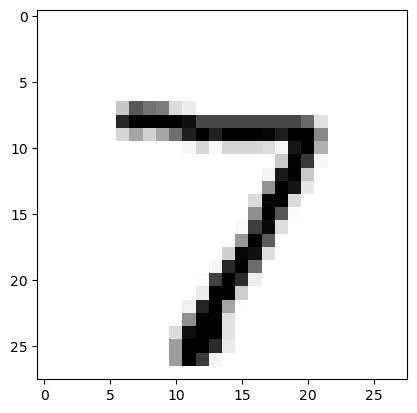

In [21]:
image_array = numpy.asfarray(all_values[1:]).reshape(28, 28)
matplotlib.pyplot.imshow(image_array, cmap = "Greys", interpolation = "None")

In [36]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[1.74303902e-03],
       [5.59021561e-03],
       [3.33123265e-03],
       [4.52199845e-03],
       [3.18389394e-03],
       [6.20158856e-03],
       [2.69748730e-04],
       [9.84125561e-01],
       [8.38683898e-04],
       [9.79195545e-03]])

In [37]:
scorecard = []
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    print(correct_label, "correct_label")
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    print(label, "answer")
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)

7 correct_label
7 answer
2 correct_label
2 answer
1 correct_label
1 answer
0 correct_label
0 answer
4 correct_label
4 answer
1 correct_label
1 answer
4 correct_label
4 answer
9 correct_label
9 answer
5 correct_label
6 answer
9 correct_label
9 answer
0 correct_label
0 answer
6 correct_label
6 answer
9 correct_label
9 answer
0 correct_label
0 answer
1 correct_label
1 answer
5 correct_label
5 answer
9 correct_label
9 answer
7 correct_label
7 answer
3 correct_label
3 answer
4 correct_label
4 answer
9 correct_label
9 answer
6 correct_label
6 answer
6 correct_label
6 answer
5 correct_label
5 answer
4 correct_label
4 answer
0 correct_label
0 answer
7 correct_label
7 answer
4 correct_label
4 answer
0 correct_label
0 answer
1 correct_label
1 answer
3 correct_label
3 answer
1 correct_label
1 answer
3 correct_label
3 answer
4 correct_label
0 answer
7 correct_label
7 answer
2 correct_label
2 answer
7 correct_label
7 answer
1 correct_label
1 answer
2 correct_label
3 answer
1 correct_label
1 answer


8 answer
0 correct_label
0 answer
8 correct_label
3 answer
2 correct_label
3 answer
1 correct_label
1 answer
7 correct_label
7 answer
0 correct_label
0 answer
6 correct_label
6 answer
5 correct_label
5 answer
4 correct_label
4 answer
3 correct_label
3 answer
8 correct_label
3 answer
0 correct_label
0 answer
9 correct_label
9 answer
6 correct_label
6 answer
3 correct_label
3 answer
8 correct_label
8 answer
0 correct_label
0 answer
9 correct_label
9 answer
9 correct_label
9 answer
6 correct_label
6 answer
8 correct_label
8 answer
6 correct_label
6 answer
8 correct_label
8 answer
5 correct_label
5 answer
7 correct_label
7 answer
8 correct_label
8 answer
6 correct_label
6 answer
0 correct_label
0 answer
2 correct_label
2 answer
4 correct_label
6 answer
0 correct_label
0 answer
2 correct_label
2 answer
2 correct_label
8 answer
3 correct_label
3 answer
1 correct_label
1 answer
9 correct_label
9 answer
7 correct_label
7 answer
5 correct_label
5 answer
1 correct_label
1 answer
0 correct_label


1 answer
1 correct_label
1 answer
9 correct_label
9 answer
6 correct_label
6 answer
4 correct_label
4 answer
0 correct_label
0 answer
9 correct_label
9 answer
4 correct_label
9 answer
8 correct_label
8 answer
3 correct_label
3 answer
8 correct_label
8 answer
6 correct_label
6 answer
0 correct_label
0 answer
2 correct_label
2 answer
5 correct_label
5 answer
1 correct_label
1 answer
9 correct_label
9 answer
6 correct_label
6 answer
2 correct_label
2 answer
9 correct_label
9 answer
4 correct_label
4 answer
0 correct_label
0 answer
9 correct_label
9 answer
6 correct_label
6 answer
0 correct_label
0 answer
6 correct_label
6 answer
2 correct_label
2 answer
5 correct_label
5 answer
4 correct_label
4 answer
2 correct_label
2 answer
3 correct_label
3 answer
8 correct_label
8 answer
4 correct_label
4 answer
5 correct_label
5 answer
5 correct_label
9 answer
0 correct_label
0 answer
3 correct_label
3 answer
8 correct_label
8 answer
5 correct_label
5 answer
3 correct_label
3 answer
5 correct_label


7 answer
0 correct_label
0 answer
0 correct_label
0 answer
6 correct_label
6 answer
7 correct_label
7 answer
5 correct_label
5 answer
8 correct_label
8 answer
6 correct_label
6 answer
0 correct_label
0 answer
9 correct_label
9 answer
3 correct_label
3 answer
7 correct_label
9 answer
1 correct_label
1 answer
3 correct_label
3 answer
5 correct_label
5 answer
4 correct_label
4 answer
3 correct_label
3 answer
3 correct_label
3 answer
5 correct_label
5 answer
5 correct_label
5 answer
6 correct_label
6 answer
3 correct_label
3 answer
0 correct_label
0 answer
2 correct_label
2 answer
3 correct_label
3 answer
4 correct_label
4 answer
2 correct_label
2 answer
3 correct_label
3 answer
0 correct_label
0 answer
9 correct_label
9 answer
9 correct_label
9 answer
4 correct_label
4 answer
7 correct_label
7 answer
2 correct_label
2 answer
8 correct_label
2 answer
4 correct_label
4 answer
7 correct_label
7 answer
0 correct_label
0 answer
6 correct_label
6 answer
2 correct_label
0 answer
8 correct_label


8 answer
3 correct_label
3 answer
1 correct_label
1 answer
0 correct_label
0 answer
0 correct_label
0 answer
7 correct_label
7 answer
6 correct_label
6 answer
6 correct_label
6 answer
2 correct_label
2 answer
1 correct_label
1 answer
6 correct_label
6 answer
9 correct_label
9 answer
3 correct_label
3 answer
1 correct_label
1 answer
8 correct_label
8 answer
6 correct_label
6 answer
9 correct_label
9 answer
0 correct_label
0 answer
6 correct_label
6 answer
0 correct_label
0 answer
0 correct_label
0 answer
0 correct_label
0 answer
6 correct_label
6 answer
3 correct_label
3 answer
5 correct_label
5 answer
9 correct_label
9 answer
3 correct_label
3 answer
4 correct_label
9 answer
5 correct_label
5 answer
5 correct_label
5 answer
8 correct_label
8 answer
5 correct_label
5 answer
3 correct_label
3 answer
0 correct_label
0 answer
4 correct_label
4 answer
0 correct_label
0 answer
2 correct_label
2 answer
9 correct_label
9 answer
6 correct_label
6 answer
8 correct_label
8 answer
2 correct_label


6 answer
6 correct_label
6 answer
5 correct_label
5 answer
7 correct_label
7 answer
0 correct_label
0 answer
8 correct_label
8 answer
6 correct_label
6 answer
4 correct_label
4 answer
7 correct_label
7 answer
9 correct_label
9 answer
0 correct_label
0 answer
7 correct_label
7 answer
3 correct_label
3 answer
4 correct_label
4 answer
2 correct_label
2 answer
1 correct_label
1 answer
8 correct_label
8 answer
8 correct_label
8 answer
5 correct_label
5 answer
9 correct_label
9 answer
2 correct_label
2 answer
7 correct_label
7 answer
1 correct_label
1 answer
8 correct_label
8 answer
8 correct_label
8 answer
8 correct_label
3 answer
2 correct_label
2 answer
7 correct_label
7 answer
6 correct_label
6 answer
0 correct_label
0 answer
1 correct_label
1 answer
2 correct_label
2 answer
7 correct_label
7 answer
1 correct_label
1 answer
0 correct_label
0 answer
8 correct_label
8 answer
3 correct_label
3 answer
6 correct_label
6 answer
0 correct_label
0 answer
5 correct_label
5 answer
3 correct_label


5 answer
9 correct_label
9 answer
5 correct_label
5 answer
8 correct_label
8 answer
4 correct_label
4 answer
9 correct_label
9 answer
9 correct_label
9 answer
1 correct_label
1 answer
6 correct_label
6 answer
5 correct_label
5 answer
0 correct_label
0 answer
1 correct_label
1 answer
3 correct_label
3 answer
7 correct_label
2 answer
0 correct_label
0 answer
3 correct_label
9 answer
4 correct_label
4 answer
8 correct_label
8 answer
2 correct_label
2 answer
2 correct_label
2 answer
0 correct_label
0 answer
2 correct_label
2 answer
5 correct_label
8 answer
1 correct_label
1 answer
5 correct_label
5 answer
1 correct_label
1 answer
4 correct_label
6 answer
8 correct_label
8 answer
8 correct_label
8 answer
9 correct_label
9 answer
1 correct_label
1 answer
2 correct_label
2 answer
1 correct_label
1 answer
3 correct_label
3 answer
5 correct_label
5 answer
1 correct_label
1 answer
0 correct_label
0 answer
9 correct_label
9 answer
4 correct_label
4 answer
4 correct_label
4 answer
8 correct_label


8 answer
3 correct_label
3 answer
4 correct_label
4 answer
0 correct_label
0 answer
7 correct_label
3 answer
8 correct_label
8 answer
3 correct_label
3 answer
9 correct_label
9 answer
3 correct_label
3 answer
4 correct_label
4 answer
6 correct_label
6 answer
5 correct_label
5 answer
6 correct_label
6 answer
2 correct_label
2 answer
3 correct_label
3 answer
9 correct_label
9 answer
2 correct_label
2 answer
6 correct_label
6 answer
0 correct_label
0 answer
0 correct_label
0 answer
6 correct_label
0 answer
1 correct_label
1 answer
2 correct_label
2 answer
8 correct_label
8 answer
7 correct_label
7 answer
9 correct_label
9 answer
8 correct_label
8 answer
2 correct_label
2 answer
0 correct_label
0 answer
4 correct_label
4 answer
7 correct_label
7 answer
7 correct_label
7 answer
5 correct_label
5 answer
0 correct_label
0 answer
5 correct_label
5 answer
6 correct_label
6 answer
4 correct_label
4 answer
6 correct_label
6 answer
7 correct_label
7 answer
4 correct_label
4 answer
3 correct_label


7 answer
0 correct_label
0 answer
0 correct_label
0 answer
7 correct_label
7 answer
5 correct_label
5 answer
1 correct_label
1 answer
1 correct_label
1 answer
7 correct_label
7 answer
6 correct_label
6 answer
6 correct_label
6 answer
6 correct_label
6 answer
8 correct_label
8 answer
2 correct_label
2 answer
2 correct_label
2 answer
7 correct_label
7 answer
7 correct_label
7 answer
4 correct_label
4 answer
0 correct_label
0 answer
2 correct_label
2 answer
4 correct_label
4 answer
2 correct_label
2 answer
1 correct_label
1 answer
8 correct_label
8 answer
9 correct_label
9 answer
6 correct_label
6 answer
1 correct_label
1 answer
0 correct_label
0 answer
5 correct_label
5 answer
9 correct_label
9 answer
6 correct_label
6 answer
9 correct_label
9 answer
8 correct_label
8 answer
0 correct_label
0 answer
3 correct_label
0 answer
0 correct_label
0 answer
8 correct_label
8 answer
3 correct_label
3 answer
9 correct_label
9 answer
6 correct_label
6 answer
3 correct_label
3 answer
0 correct_label


7 answer
8 correct_label
8 answer
9 correct_label
9 answer
0 correct_label
0 answer
1 correct_label
1 answer
2 correct_label
2 answer
3 correct_label
9 answer
5 correct_label
5 answer
6 correct_label
6 answer
0 correct_label
0 answer
1 correct_label
1 answer
2 correct_label
2 answer
3 correct_label
3 answer
4 correct_label
4 answer
5 correct_label
5 answer
6 correct_label
6 answer
8 correct_label
8 answer
7 correct_label
7 answer
1 correct_label
1 answer
3 correct_label
3 answer
2 correct_label
2 answer
8 correct_label
6 answer
0 correct_label
0 answer
7 correct_label
7 answer
5 correct_label
5 answer
9 correct_label
9 answer
9 correct_label
9 answer
6 correct_label
6 answer
0 correct_label
0 answer
9 correct_label
9 answer
4 correct_label
4 answer
1 correct_label
1 answer
3 correct_label
3 answer
2 correct_label
2 answer
1 correct_label
1 answer
2 correct_label
2 answer
3 correct_label
3 answer
8 correct_label
8 answer
3 correct_label
3 answer
2 correct_label
2 answer
6 correct_label


5 answer
6 correct_label
6 answer
7 correct_label
7 answer
8 correct_label
8 answer
2 correct_label
2 answer
1 correct_label
1 answer
7 correct_label
7 answer
2 correct_label
2 answer
5 correct_label
5 answer
0 correct_label
0 answer
8 correct_label
8 answer
0 correct_label
0 answer
2 correct_label
2 answer
7 correct_label
7 answer
8 correct_label
6 answer
8 correct_label
8 answer
3 correct_label
3 answer
6 correct_label
6 answer
0 correct_label
0 answer
2 correct_label
2 answer
7 correct_label
7 answer
6 correct_label
6 answer
6 correct_label
6 answer
1 correct_label
1 answer
2 correct_label
2 answer
8 correct_label
8 answer
8 correct_label
8 answer
7 correct_label
7 answer
7 correct_label
7 answer
4 correct_label
4 answer
7 correct_label
7 answer
7 correct_label
7 answer
3 correct_label
3 answer
7 correct_label
7 answer
4 correct_label
4 answer
5 correct_label
5 answer
4 correct_label
4 answer
3 correct_label
3 answer
3 correct_label
3 answer
8 correct_label
8 answer
4 correct_label


9 answer
4 correct_label
4 answer
2 correct_label
2 answer
1 correct_label
1 answer
9 correct_label
9 answer
4 correct_label
4 answer
9 correct_label
9 answer
1 correct_label
1 answer
3 correct_label
3 answer
9 correct_label
9 answer
2 correct_label
2 answer
0 correct_label
0 answer
6 correct_label
6 answer
0 correct_label
0 answer
4 correct_label
4 answer
0 correct_label
0 answer
6 correct_label
6 answer
0 correct_label
0 answer
1 correct_label
1 answer
2 correct_label
2 answer
3 correct_label
3 answer
4 correct_label
4 answer
5 correct_label
5 answer
6 correct_label
6 answer
7 correct_label
7 answer
8 correct_label
8 answer
9 correct_label
9 answer
0 correct_label
0 answer
1 correct_label
1 answer
2 correct_label
2 answer
3 correct_label
3 answer
4 correct_label
4 answer
5 correct_label
5 answer
6 correct_label
6 answer
7 correct_label
7 answer
8 correct_label
8 answer
9 correct_label
9 answer
0 correct_label
0 answer
1 correct_label
1 answer
2 correct_label
2 answer
3 correct_label


1 answer
2 correct_label
2 answer
3 correct_label
3 answer
4 correct_label
4 answer
5 correct_label
4 answer
6 correct_label
6 answer
7 correct_label
7 answer
8 correct_label
8 answer
9 correct_label
9 answer
0 correct_label
0 answer
1 correct_label
1 answer
2 correct_label
2 answer
3 correct_label
3 answer
4 correct_label
4 answer
5 correct_label
5 answer
6 correct_label
6 answer
7 correct_label
7 answer
8 correct_label
8 answer
9 correct_label
9 answer
0 correct_label
0 answer
0 correct_label
0 answer
7 correct_label
7 answer
2 correct_label
2 answer
6 correct_label
6 answer
5 correct_label
4 answer
5 correct_label
5 answer
3 correct_label
3 answer
7 correct_label
7 answer
8 correct_label
9 answer
6 correct_label
6 answer
6 correct_label
6 answer
6 correct_label
6 answer
6 correct_label
6 answer
4 correct_label
4 answer
3 correct_label
3 answer
8 correct_label
8 answer
8 correct_label
8 answer
3 correct_label
3 answer
0 correct_label
0 answer
1 correct_label
1 answer
9 correct_label


2 answer
3 correct_label
3 answer
4 correct_label
4 answer
5 correct_label
5 answer
6 correct_label
6 answer
7 correct_label
7 answer
8 correct_label
8 answer
9 correct_label
9 answer
0 correct_label
0 answer
1 correct_label
1 answer
2 correct_label
2 answer
3 correct_label
3 answer
4 correct_label
4 answer
5 correct_label
5 answer
6 correct_label
6 answer
7 correct_label
7 answer
8 correct_label
8 answer
9 correct_label
9 answer
0 correct_label
0 answer
1 correct_label
1 answer
2 correct_label
2 answer
3 correct_label
3 answer
4 correct_label
4 answer
5 correct_label
5 answer
6 correct_label
6 answer
7 correct_label
7 answer
8 correct_label
8 answer
9 correct_label
9 answer
8 correct_label
8 answer
6 correct_label
6 answer
5 correct_label
5 answer
9 correct_label
9 answer
7 correct_label
7 answer
0 correct_label
0 answer
2 correct_label
2 answer
3 correct_label
3 answer
4 correct_label
4 answer
3 correct_label
3 answer
8 correct_label
8 answer
5 correct_label
5 answer
1 correct_label


6 answer
9 correct_label
9 answer
3 correct_label
3 answer
2 correct_label
2 answer
4 correct_label
4 answer
8 correct_label
8 answer
6 correct_label
6 answer
0 correct_label
0 answer
5 correct_label
5 answer
7 correct_label
7 answer
5 correct_label
5 answer
1 correct_label
1 answer
0 correct_label
0 answer
8 correct_label
8 answer
1 correct_label
1 answer
6 correct_label
6 answer
7 correct_label
7 answer
2 correct_label
3 answer
9 correct_label
9 answer
7 correct_label
7 answer
9 correct_label
9 answer
5 correct_label
5 answer
6 correct_label
6 answer
5 correct_label
5 answer
2 correct_label
2 answer
6 correct_label
6 answer
2 correct_label
2 answer
8 correct_label
8 answer
1 correct_label
1 answer
7 correct_label
7 answer
5 correct_label
5 answer
5 correct_label
5 answer
7 correct_label
7 answer
3 correct_label
3 answer
5 correct_label
5 answer
0 correct_label
0 answer
1 correct_label
1 answer
1 correct_label
1 answer
3 correct_label
3 answer
8 correct_label
8 answer
4 correct_label


8 answer
0 correct_label
0 answer
6 correct_label
6 answer
8 correct_label
8 answer
1 correct_label
1 answer
7 correct_label
7 answer
9 correct_label
9 answer
1 correct_label
1 answer
9 correct_label
9 answer
2 correct_label
2 answer
6 correct_label
6 answer
7 correct_label
7 answer
6 correct_label
6 answer
6 correct_label
6 answer
8 correct_label
8 answer
7 correct_label
7 answer
4 correct_label
4 answer
9 correct_label
9 answer
2 correct_label
2 answer
1 correct_label
1 answer
3 correct_label
3 answer
3 correct_label
3 answer
0 correct_label
0 answer
5 correct_label
5 answer
5 correct_label
5 answer
8 correct_label
8 answer
0 correct_label
0 answer
3 correct_label
3 answer
7 correct_label
7 answer
9 correct_label
9 answer
7 correct_label
7 answer
0 correct_label
0 answer
2 correct_label
2 answer
7 correct_label
7 answer
9 correct_label
9 answer
1 correct_label
1 answer
7 correct_label
7 answer
8 correct_label
8 answer
0 correct_label
0 answer
3 correct_label
3 answer
5 correct_label


9 answer
0 correct_label
0 answer
1 correct_label
1 answer
2 correct_label
3 answer
3 correct_label
3 answer
4 correct_label
4 answer
5 correct_label
3 answer
6 correct_label
6 answer
7 correct_label
7 answer
8 correct_label
8 answer
9 correct_label
9 answer
0 correct_label
0 answer
1 correct_label
1 answer
2 correct_label
2 answer
3 correct_label
3 answer
4 correct_label
4 answer
5 correct_label
6 answer
6 correct_label
6 answer
7 correct_label
7 answer
8 correct_label
8 answer
9 correct_label
8 answer
7 correct_label
7 answer
4 correct_label
4 answer
6 correct_label
6 answer
1 correct_label
1 answer
4 correct_label
4 answer
0 correct_label
0 answer
9 correct_label
9 answer
9 correct_label
9 answer
3 correct_label
3 answer
7 correct_label
7 answer
8 correct_label
8 answer
4 correct_label
4 answer
7 correct_label
7 answer
5 correct_label
5 answer
8 correct_label
8 answer
5 correct_label
6 answer
3 correct_label
3 answer
2 correct_label
2 answer
2 correct_label
2 answer
0 correct_label


In [30]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 

In [38]:
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9451
